# PCA-MNIST
本 notebook 是使用主成分分析法对 MNIST 数据集进行图像压缩。

代码主要参考自 裔隽，张怿檬，张目清等．Python机器学习实战[M]．北京：科学技术文献出版社，2018

**设置环境如下**

python 的版本为 3.7.0

numpy 库的版本为 1.15.6

scikit-learn 库的版本为 0.20.0

matplotlib 库的版本为 3.0.0

## 1 MNIST 数据集简介
图像可以看作一个二维的矩阵，每个像素点就对应了它的一个特征维度。例如，一幅宽高为 $20 \times 20$ 个像素的图形就有 400 个特征维度。

MNIST是手写数字数据集，每个样本图像的宽高为 $28\times28$ 像素，也就是说每个原始样本具有 784 个特征。

## 2 降维压缩

In [1]:
# 导入需要的库
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

In [4]:
# 导入 MNIST 数据集
#mnist=fetch_mldata('MNIST original')
# 由于国内网络无法正常访问 mldata，导致 sklearn.datasets 下载MNIST Original 出现连接错误
# 所以通过其他途径获取到 mnist-original.mat 文件，在当前文件夹下面新建 mldata 文件夹，并放入 .mat 文件，同时使用下面这行代码导入数据
mnist=fetch_mldata('MNIST original', data_home='./')
x=mnist["data"]
y=mnist["target"]

c:\users\ivy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\ivy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
# 调用 PCA 函数
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# 计算各个 n 下的累计贡献率。累计贡献率达到 90% 时的主成分数据 d=87
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.9)+1

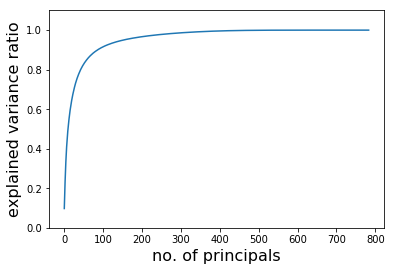

In [8]:
# 绘制累计贡献率与主成分数目关系图
plt.plot(cumsum)
plt.ylim(0,1.1)
plt.xlabel('no. of principals', fontsize=16)
plt.ylabel('explained variance ratio',fontsize=16)
plt.show()

In [12]:
# 观察主成分数为5、15、35、85时，图像的压缩效果
Xr=[]
for n in [5,15,35,85]:
    pca=PCA(n_components=n)
    X_reduced=pca.fit_transform(x)
    X_recovered=pca.inverse_transform(X_reduced)
    Xr.append(X_recovered)

In [14]:
# 数据整理
instances=[]
for i in range(10):
    instances.append(x[y==i][0])
    for j in range(1,5):
        instances.append(Xr[j-1][y==i][0])

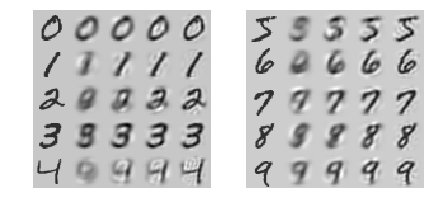

In [16]:
# 绘制效果图
def plot_digits(instances):
    images=[instance.reshape(28,28) for instance in instances]
    row_images=[]
    for row in range(5):
        rimages=images[row*5:(row+1)*5]
        row_images.append(np.concatenate(rimages,axis=1))
    image=np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap=matplotlib.cm.binary)
    plt.axis("off")
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(instances[:25])
plt.subplot(122)
plot_digits(instances[25:])
plt.show()

可见上图显示了原始数据（第一列）与PCA压缩恢复后的数据（第二、三、四、五列对应的主成分数目分别为 5、15、35、85）。发现当主成分数目 d=85 时，图像已经相当清晰了。